This is going to be a simple attempt at linear regression on a novel (to me) dataset.
I will be looking at fertilizer consumption in the US between 1960 and 2011 to train a model to predict future fertilizer consumption.

If it turns out to be kind of lame, I'll find some other metric to measure it against, such as population size?
I might do that anyway, not that I mention it.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_excel('fertilizeruse.xls')[6:]

In [14]:
title = "U.S. consumption of plant nutrients"
# "T" for 'nutrient short tons' but I don't know what that means and fucked if I care about agriculture enough to find out!
# Also instead of nutrient directly, it's actually 'primary' nutrient content.
cols = [
    "Year (ending June 30)",
    "Nitrogen (N) 1000Ts",
    "Phosphate (P2O5) 1000Ts",
    "Potash (K2O) 1000Ts",
    "Total 1000Ts",
    "Nitrogen (%)",
    "Phosphate (%)",
    "Potash (%)"
]

AttributeError: 'DataFrame' object has no attribute 'header'

In [28]:
# Some cleanup - not sure if there's a better way, but at this point, whatever
df.drop('Unnamed: 1', axis=1, inplace=True)

KeyError: "['Unnamed: 1'] not found in axis"

In [30]:
df.drop("Unnamed: 6", axis=1, inplace=True)
df.columns = cols

In [43]:
df = df[:52][:]
# df.reindex()
df

,Year (ending June 30),Nitrogen (N) 1000Ts,Phosphate (P2O5) 1000Ts,Potash (K2O) 1000Ts,Total 1000Ts,Nitrogen (%),Phosphate (%),Potash (%)
0,1960,2738,2572.4,2153.3,7463.7,36.684218,34.46548,28.850302
1,1961,3030.8,2645.1,2168.5,7844.4,38.63648,33.719596,27.643924
2,1962,3370,2807,2270.5,8447.5,39.89346,33.228766,26.877774
3,1963,3929.1,3072.9,2503.4,9505.4,41.335451,32.32794,26.336609
4,1964,4352.8,3377.8,2729.7,10460.3,41.612573,32.291617,26.09581
5,1965,4638.5,3512.2,2834.5,10985.2,42.224994,31.972108,25.802898
6,1966,5326.3,3897.1,3221.2,12444.6,42.80009,31.315591,25.884319
7,1967,6027.1,4304.7,3641.8,13973.6,43.132049,30.805948,26.062003
8,1968,6787.6,4453.3,3792.6,15033.5,45.149832,29.62251,25.227658
9,1969,6957.6,4665.6,3891.6,15514.8,44.844922,30.071931,25.083146


Now that we're sufficiently cleaned up...
The simplest start (And it's 1am, so) would be to plot Year vs Total:

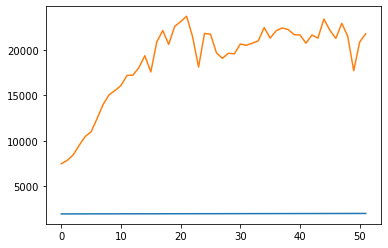

In [50]:
data = df[['Year (ending June 30)', 'Total 1000Ts']]
plt.plot(data)

Well, that's clearly not linear.